<a href="https://colab.research.google.com/github/niteeshpandey9555-crypto/E-Commerce-SQL-Analytics/blob/main/Strategic_Predictive_Modeling_for_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset
df = pd.read_csv('data.csv')

# Displaying the first few rows to understand the structure
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


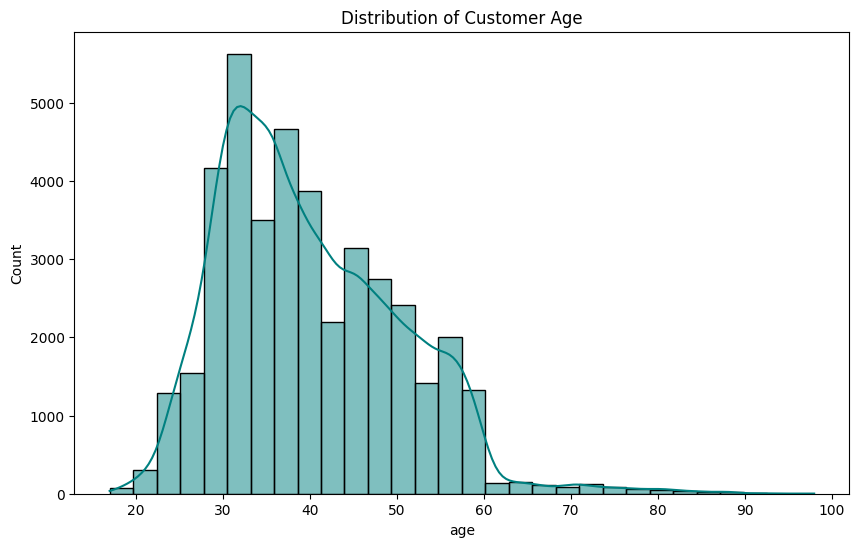

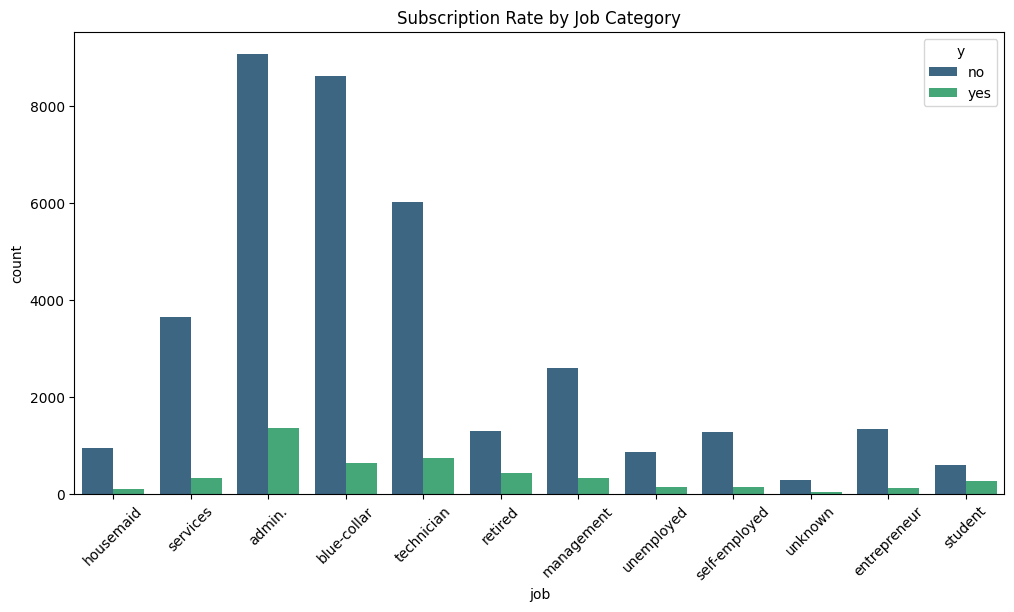

In [3]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Customer Age')
plt.show()

# Job Category Analysis
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y', palette='viridis')
plt.xticks(rotation=45)
plt.title('Subscription Rate by Job Category')
plt.show()


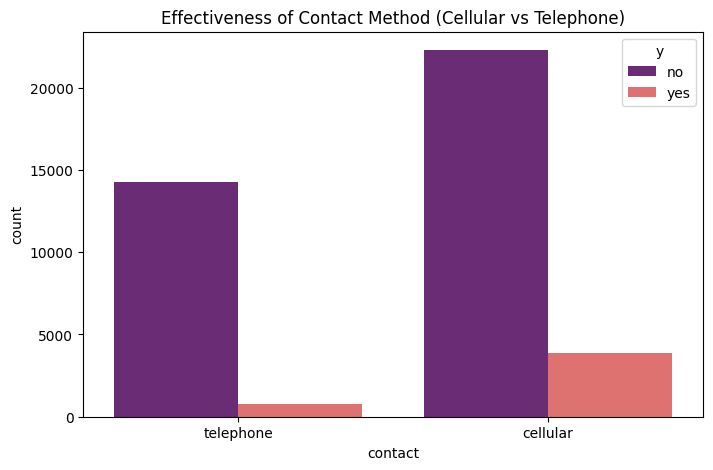

In [4]:
# Analysis of Contact Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='contact', hue='y', palette='magma')
plt.title('Effectiveness of Contact Method (Cellular vs Telephone)')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables for the model
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col.astype(str)))

# Defining Features (X) and Target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Splitting data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.65      0.22      0.33       935

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
